# Financial Data Exploration

In this project, I will be extracting financial data for a specific set of companies, focusing on understanding their financial performance over time.

**Goal**:
* To perform a detailed analysis of this financial data, including trend analysis and comparative studies.

Diving deeper, we have two primary aims with this study:
1. To analyze the financial trend of `accrued expenses turnover` over a period for various companies, particularly banks.
2. To examine how different regions conribute to these financial metrics.

## Working with the Endpoint and Paramenters to Query the API

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import config
import json
from requests.exceptions import RequestException, HTTPError

api_key = config.API_KEY
api_url = "https://data.nasdaq.com/api/v3/datatables/MER/F1.json"

params = {
    'api_key': api_key,
    'qopts.per_page': 10
}

try:
    response = requests.get(api_url, params=params)
    response.raise_for_status()
except RequestExceptions as error:
    print(f"Unable to handle request: {error}")
except HTTPError as error:
    print(f"Unable to handle requests: {error}")
json_data = response.json()
print(json_data)

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

## Processing the JSON Data into a DataFrame

In [2]:
api_url = "https://data.nasdaq.com/api/v3/datatables/MER/F1.json"

params = {
    'api_key': api_key,
    'qopts.per_page': 10000
}

response = requests.get(api_url, params=params)
json_data = response.json()

data = json_data['datatable']['data']
columns = [col['name'] for col in json_data['datatable']['columns']]

df_metric = pd.DataFrame(data, columns=columns)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


## Understanding the Dataset

In [3]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [4]:
necessary_columns=['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement']

### Importance of Selected Columns for Financial Analysis Project

In this project, we aim to extract and analyze financial data for a set of companies, with a focus on understanding their financial performance over time. The selected columns are essential for achieving this goal due to the following reasons:

1. **Report ID (`reportid`)**:
   - Ensures each report is uniquely identifiable, allowing for precise tracking and referencing of data.

2. **Report Date (`reportdate`)**:
   - Provides the temporal context necessary for time-series analysis, enabling us to observe trends and changes over time.

3. **Report Type (`reporttype`)**:
   - Helps in categorizing and filtering the data based on the nature of the report, ensuring consistency and relevance in our analysis.

4. **Amount (`amount`)**:
   - Represents the core financial figures that we will analyze, forming the basis for calculating trends, averages, and other key metrics.

5. **Company Name (`longname`)**:
   - Identifies the specific company to which the financial data belongs, crucial for conducting company-specific analysis and comparisons.

6. **Country (`country`)**:
   - Indicates the country of operation, allowing us to compare financial metrics across different national contexts and understand local economic impacts.

7. **Region (`region`)**:
   - Provides a broader geographical context, facilitating regional comparisons and the identification of wider economic trends.

8. **Financial Indicator (`indicator`)**:
   - Specifies the particular financial metric or ratio, such as accrued expenses turnover, that we are analyzing, enabling focused and relevant analysis.

9. **Financial Statement (`statement`)**:
   - Categorizes the data according to the type of financial statement (e.g., balance sheet, income statement), allowing for more detailed and specific analysis.

By incorporating these columns, we can ensure a comprehensive and structured approach to our financial analysis. This enables us to track performance over time, conduct in-depth company-specific and regional comparisons, and maintain the integrity and relevance of our data.

## Filtering the DataFrame for Analysis

### Accrued Expenses Turnover

"Accrued Expenses Turnover" is a key financial efficiency ratio. It measures how often a company pays off its accrued expenses within a certain period, providing insights into:

- **Cash Flow Management**: It indicates how well a company is managing its cash flow in relation to its short-term obligations. A higher ratio suggests efficient management and a strong liquidity position.
- **Operational Efficiency**: This metric can reflect a company's operational efficiency, showing how promptly it settles its short-term debts.
- **Financial Health Indicator**: Regular payment of accrued expenses signifies good financial health and creditworthiness, which is essential for maintaining good supplier relationships and business stability.

In [5]:
filtered_df = df_metric[necessary_columns]
filtered_df = filtered_df[filtered_df['indicator']=='Accrued Expenses Turnover']
filtered_df['indicator'].describe()

count                           139
unique                            1
top       Accrued Expenses Turnover
freq                            139
Name: indicator, dtype: object

### Output Explanation

The output of `describe()` for the 'indicator' column shows the following statistics:

- **count**: 139
  - There are 139 entries in the filtered DataFrame where the 'indicator' is 'Accrued Expenses Turnover'.
- **unique**: 1
  - There is only one unique value in this column, which is 'Accrued Expenses Turnover'.
- **top**: 'Accrued Expenses Turnover'
  - The most frequent value (top) in this column is 'Accrued Expenses Turnover'.
- **freq**: 139
  - The frequency of the top value is 139, meaning all 139 entries have 'Accrued Expenses Turnover' as their indicator.

This confirms that the DataFrame has been successfully filtered to contain only the entries related to "Accrued Expenses Turnover," allowing for further analysis on this specific financial metric.

## Enhancing the DataFrame

In [6]:
filtered_df['country'].value_counts()

country
USA    31
JPN    27
CYM    27
IRL    25
BHS    19
DEU     6
GBR     4
Name: count, dtype: int64

In [7]:
country_mapping = {
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas',
    'IRL': 'Ireland',
    'GBR': 'United Kingdom'

}


def country_name(name):
    return country_mapping.get(name, name)

filtered_df = filtered_df.copy()
filtered_df['country_name'] = filtered_df['country'].apply(country_name)
filtered_df.columns=['report_id','report_date','report_type',
                   'amount','company_name','country','region',
                   'indicator','statement','country_name']
updated_df = filtered_df.copy()
updated_df['country_name'].value_counts()

country_name
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
United Kingdom               4
Name: count, dtype: int64

## Understanding Financial Trends Over Time

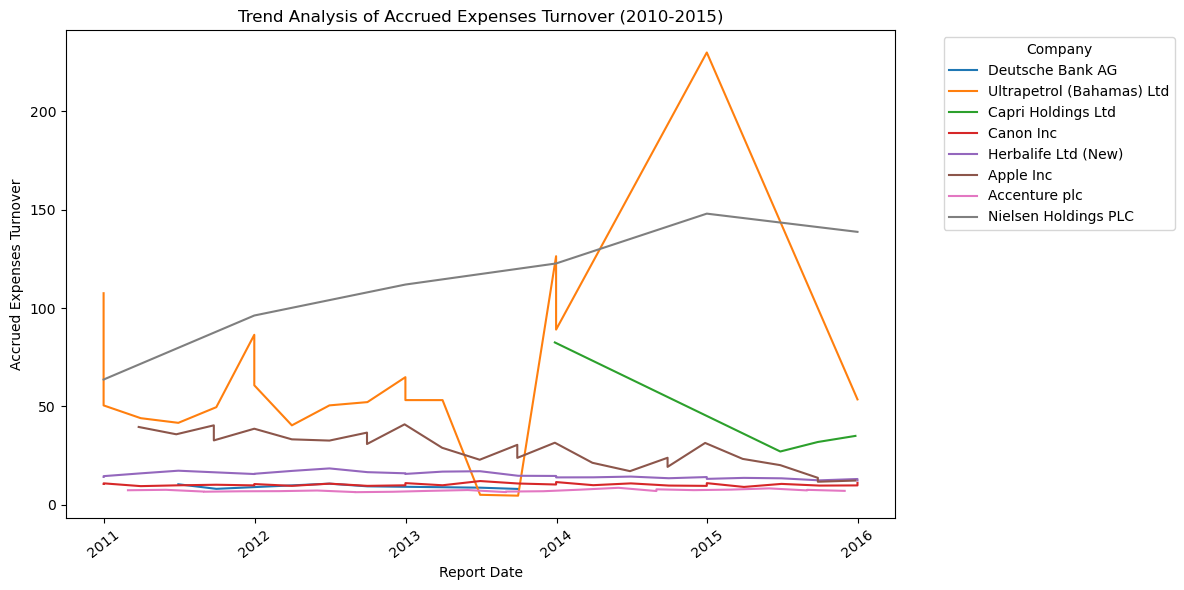

In [32]:
# Convert 'report_date' to datetime and filter for 2010-2015
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

necessary_cols = ['company_name', 'report_date', 'amount']
relevant_data = updated_df[necessary_cols].copy()

plt.figure(figsize=(12, 6))

unique_company_names = relevant_data['company_name'].unique()
for name in unique_company_names:
    company_data = relevant_data[relevant_data['company_name'] == name]
    plt.plot(company_data['report_date'], company_data['amount'], label=name)
    
plt.title('Trend Analysis of Accrued Expenses Turnover (2010-2015)')
plt.xlabel('Report Date')
plt.ylabel('Accrued Expenses Turnover')
plt.xticks(rotation=38)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Geographical Region Analysis

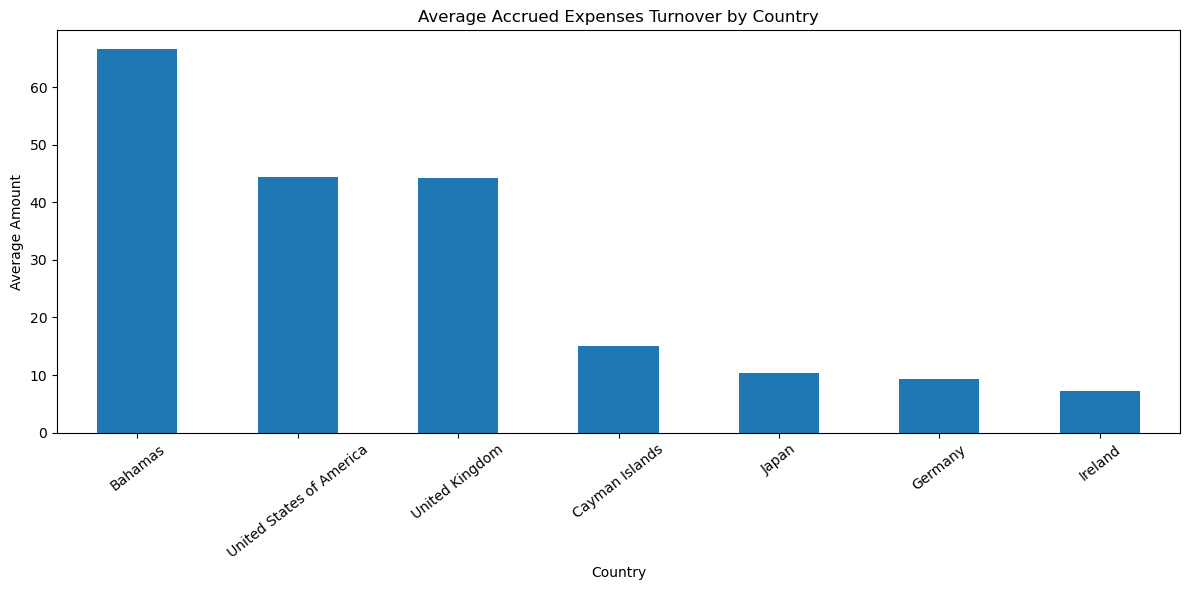

In [46]:
country_avg = updated_df.groupby('country_name')['amount'].mean()

plt.figure(figsize=(12, 6))
country_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Accrued Expenses Turnover by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=38)
plt.tight_layout()
plt.show()